# Préparation de données

### Objectif : réduire les matrices de données aux gènes spécifiques de tissu disponibles dans tous les datasets

In [33]:
import pandas as pd
import numpy as np

## Liste de gènes spécifiques de tissus 

In [34]:
genelist = pd.read_csv('data/Tissue_specific_genes.csv', sep=';', index_col=0, dtype={'id_gene': np.int32})
genelist.head()

,id_gene,gene_symbol,tissue_L1,tissue_L2,Z_L1,SNR_L1,SIGNAL_L1,NOISE_L1,ref_tissue_L1,REF_L1,SRR_L1,Z_L2,SNR_L2,SIGNAL_L2,NOISE_L2,ref_tissue_L2,REF_L2,SRR_L2
tsg,,,,,,,,,,,,,,,,,,
A1BG_liver,1,A1BG,liver,hepato_bilary,4.2,1.2,6.368033,5.179102,breast,0.702595,9.1,3.8,2.6,6.169557,2.328673,female_genital,1.033241,6.0
NAT2_liver,10,NAT2,liver,hepato_bilary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,4.7,4.308817,0.924606,female_genital,0.239467,18.0
SERPINA3_pancreas,12,SERPINA3,pancreas,pancreas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,1.6,8.554874,5.459026,female_genital,3.010725,2.8
AADAC_liver,13,AADAC,liver,hepato_bilary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,2.1,6.679672,3.182688,female_genital,0.753267,8.9
AANAT_testis,15,AANAT,testis,male_germinal,5.9,3.1,1.553297,0.497196,breast,0.069155,22.5,4.1,3.7,1.553297,0.418642,female_genital,0.083883,18.5


On sélectionne les gènes qui ont un profil d'expression specifique dans un tissu, avec le rapport signal sur bruit SNR > 3.0.

In [35]:
snr = 3.0
is_specific = (genelist['SNR_L1']>snr) | (genelist['SNR_L2']>snr)

On établie la liste de gènes spécifiques qui valident cette condition.

In [36]:
id_genes = genelist.loc[is_specific, 'id_gene'].unique()
print('Number of available tissue-specific genes', len(id_genes))

Number of available tissue-specific genes 3009


On affiche le nombre de gènes par tissu.

In [37]:
nb_genes = genelist.loc[is_specific].groupby(['tissue_L1']).size().reset_index(name='number_of_genes')
nb_genes = nb_genes.sort_values(by=['number_of_genes'], ascending=False).reset_index(drop=True)
nb_genes.head()

,tissue_L1,number_of_genes
0,testis,1938
1,brain,165
2,liver,146
3,placenta,142
4,biliary_tract,87


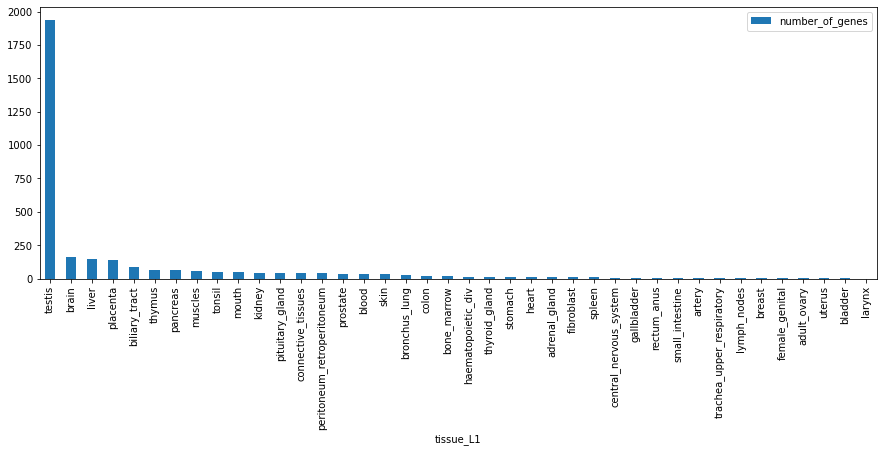

In [38]:
ax = nb_genes.plot.bar(x='tissue_L1', y='number_of_genes', rot=90, figsize=(15, 5))

## Dataset TCGA-BRCA

In [39]:
tcga = pd.read_csv('data/expression_data_tcga_brca_TCGA-BRCA_log_fpkm_1217_samples_37898_genes.csv', sep=';', index_col=0)
tcga.head()

,gene_symbol,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-UL-AAZ6-01A,TCGA-UU-A93S-01A,TCGA-V7-A7HQ-01A,TCGA-W8-A86G-01A,TCGA-WT-AB41-01A,TCGA-WT-AB44-01A,TCGA-XX-A899-01A,TCGA-XX-A89A-01A,TCGA-Z7-A8R5-01A,TCGA-Z7-A8R6-01A
id_gene,,,,,,,,,,,,,,,,,,,,,
1,A1BG,0.427080,0.443246,0.475529,0.222924,0.304934,0.201750,0.203146,0.097775,0.219991,...,0.035609,0.350086,0.375543,0.543602,0.072322,0.271245,0.264403,0.275549,0.146017,0.267740
2,A2M,5.593322,5.925400,6.150867,6.356014,6.267986,6.645355,4.902440,7.931476,7.600184,...,5.036380,4.716125,5.838158,7.217930,6.142762,5.236371,7.359784,7.006981,8.083177,5.960234
3,A2MP1,0.000000,0.063505,0.165145,0.067519,0.056045,0.086079,0.008908,0.191791,0.072917,...,0.025615,0.019346,0.037169,0.097285,0.234974,0.050448,0.214949,0.136938,0.284042,0.032637
9,NAT1,7.100449,3.453640,4.455574,4.297961,1.695378,3.839230,4.240333,0.949375,4.963636,...,1.304161,1.163692,1.997280,6.206561,2.814493,5.671559,2.438489,4.502233,5.576231,5.220328
10,NAT2,0.568351,2.191191,0.046650,0.434700,0.044057,0.562159,0.232108,0.064238,0.474661,...,0.122138,1.306973,0.490078,0.853937,0.627816,1.714388,0.177098,4.158016,0.446890,0.164657


## Dataset TSG3

In [40]:
tsg3 = pd.read_csv('data/expression_data_tsg3_3686_samples_20982_genes.csv', sep=';', index_col=0)
tsg3.head()

,gene_symbols,TCGA-06-0675-11A,TCGA-06-0678-11A,TCGA-06-0680-11A,TCGA-06-0681-11A,TCGA-06-AABW-11A,TCGA-22-4593-11A,TCGA-22-4609-11A,TCGA-22-5471-11A,TCGA-22-5472-11A,...,SAMN03465416,SAMN03465418,SAMN03465419,SAMN03465420,SAMN03465421,SAMN04457469,SAMN04457471,SAMN04457472,SAMN04457473,SAMN04457474
id_gene,,,,,,,,,,,,,,,,,,,,,
1,A1BG,0.212470,0.272732,0.264471,0.344083,0.395245,0.079055,0.077593,0.054982,0.058013,...,0.223546,0.608874,0.078287,0.033217,0.181307,1.229639,0.009618,0.343255,1.249746,0.000000
2,A2M,5.565146,5.035244,5.383507,5.515244,5.254889,9.849765,9.634644,9.262287,10.419629,...,5.314831,3.560544,4.735094,5.104626,5.961526,2.201755,1.265562,1.464626,0.060198,2.369085
3,A2MP1,0.100654,0.114971,0.112382,0.227397,0.282105,0.033050,0.080028,0.083255,0.120434,...,0.198414,0.150764,0.137090,0.018855,0.030823,0.071535,0.000000,0.100056,0.040835,0.000000
10,NAT2,0.117494,0.086131,0.224822,0.060679,0.112280,0.123072,0.195492,0.055526,0.310782,...,0.105042,0.010828,0.008827,0.000000,0.110499,0.105486,0.170669,0.000000,0.109082,0.000000
12,SERPINA3,0.398149,1.322226,0.265863,0.498421,0.509650,0.111627,0.227965,0.208663,0.106624,...,4.689869,0.325521,1.806250,7.304949,1.520126,0.476077,0.000000,0.769932,0.030950,0.875033


## Genes spécifiques de tissus présents dans tous les datasets

In [41]:
common_id_genes = set(tcga.index).intersection(set(tsg3.index)).intersection(set(id_genes))
common_id_genes = sorted(list(common_id_genes))
print('Number of common genes', len(common_id_genes))

Number of common genes 2018


## Sauvegarde de données réduites

### TCGA-BRCA

In [47]:
tcga_reduced = tcga.loc[common_id_genes]
print(tcga_reduced.shape)

(2018, 1218)


In [48]:
tcga_output_filename = 'expression_data_tcga_brca_TCGA-BRCA_log_fpkm_' + str(tcga_reduced.shape[1]) + '_samples_' + str(tcga_reduced.shape[0]) + '_genes.csv'
# tcga_reduced.to_csv('data/' + tcga_output_filename, sep=';', index=True)

### TSG3

In [49]:
tsg3_reduced = tsg3.loc[common_id_genes]
tsg3_output_filename = 'expression_data_tsg3_TSG3_log_rpkm_' + str(tsg3_reduced.shape[1]) + '_samples_' + str(tsg3_reduced.shape[0]) + '_genes.csv'
# tsg3_reduced.to_csv('data/' + tsg3_output_filename, sep=';', index=True)